In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import string

%matplotlib inline

In [3]:
df_train = pd.read_csv('/Users/healer/Downloads/Kaggle Price Suggestion/unarchieved data/train.tsv', sep='\t')
df_test = pd.read_csv('/Users/healer/Downloads/Kaggle Price Suggestion/unarchieved data/test.tsv', sep='\t')

In [7]:
df_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [9]:
print("Train shape:{}\nTest shape:{}".format(df_train.shape,df_test.shape))

Train shape:(1482535, 8)
Test shape:(693359, 7)


<function matplotlib.pyplot.show>

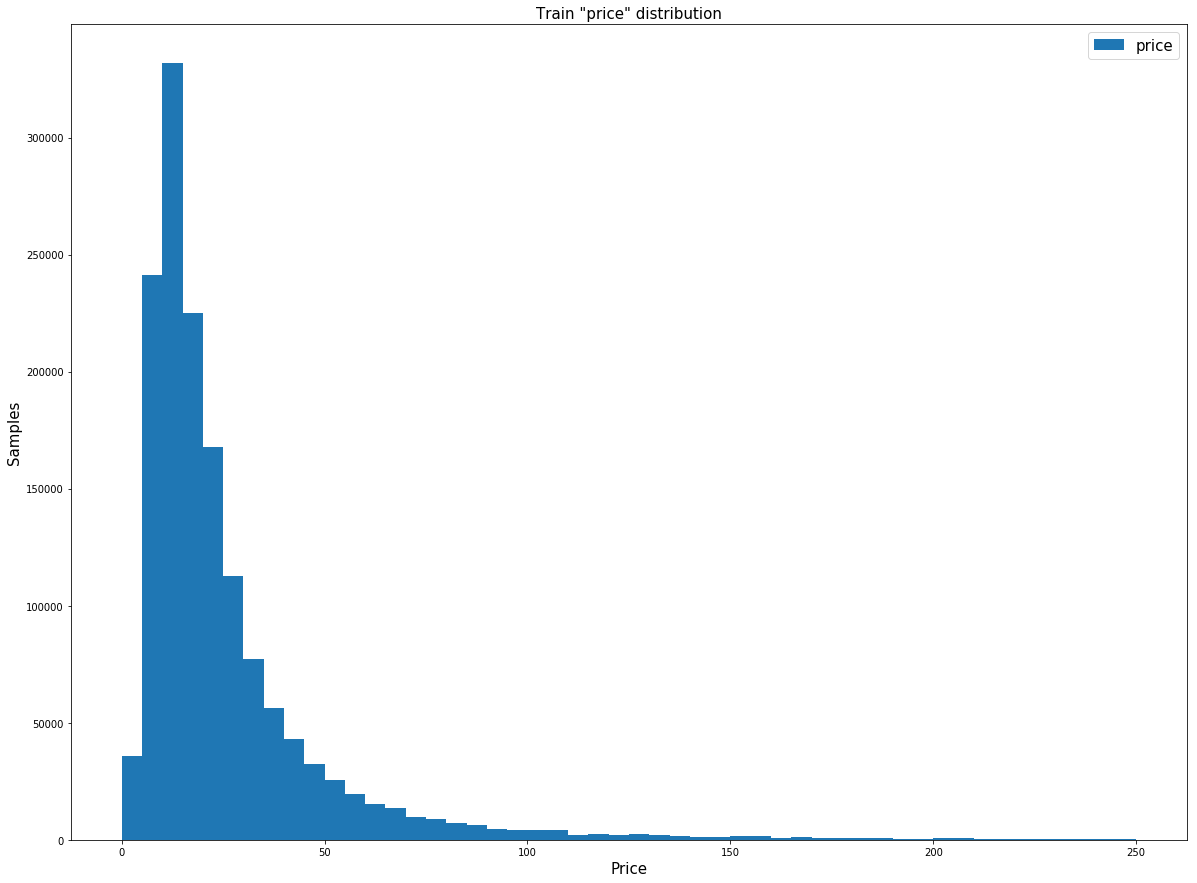

In [11]:
plt.figure(figsize=(20,15))
plt.hist(df_train['price'],bins=50,range=[0,250],label='price')
plt.title('Train "price" distribution',fontsize = 15)
plt.xlabel('Price',fontsize =15)
plt.ylabel('Samples',fontsize = 15)
plt.legend(fontsize=15)
plt.show

In [12]:
df_train['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [19]:
list(df_train.columns)

['train_id',
 'name',
 'item_condition_id',
 'category_name',
 'brand_name',
 'price',
 'shipping',
 'item_description']

<function matplotlib.pyplot.show>

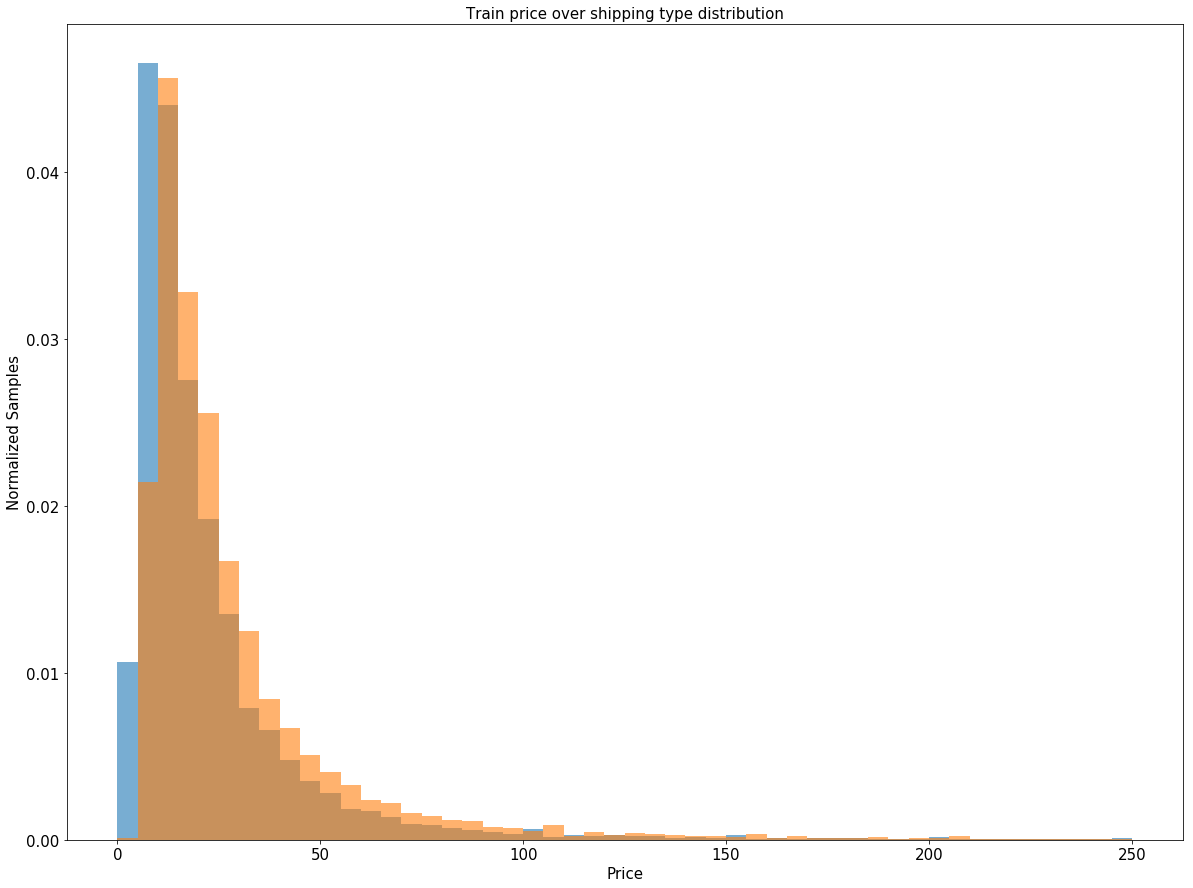

In [27]:
plt.figure(figsize=(20,15))
bins=50
plt.hist(df_train[df_train['shipping']==1]['price'],bins,
         normed=True,range=[0,250],alpha=0.6,label='price when shipping==1')
plt.hist(df_train[df_train['shipping']==0]['price'],bins,
         normed=True,range=[0,250],alpha=0.6,label='price when shipping==0')
plt.title('Train price over shipping type distribution',fontsize=15)
plt.xlabel('Price',fontsize=15)
plt.ylabel('Normalized Samples',fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


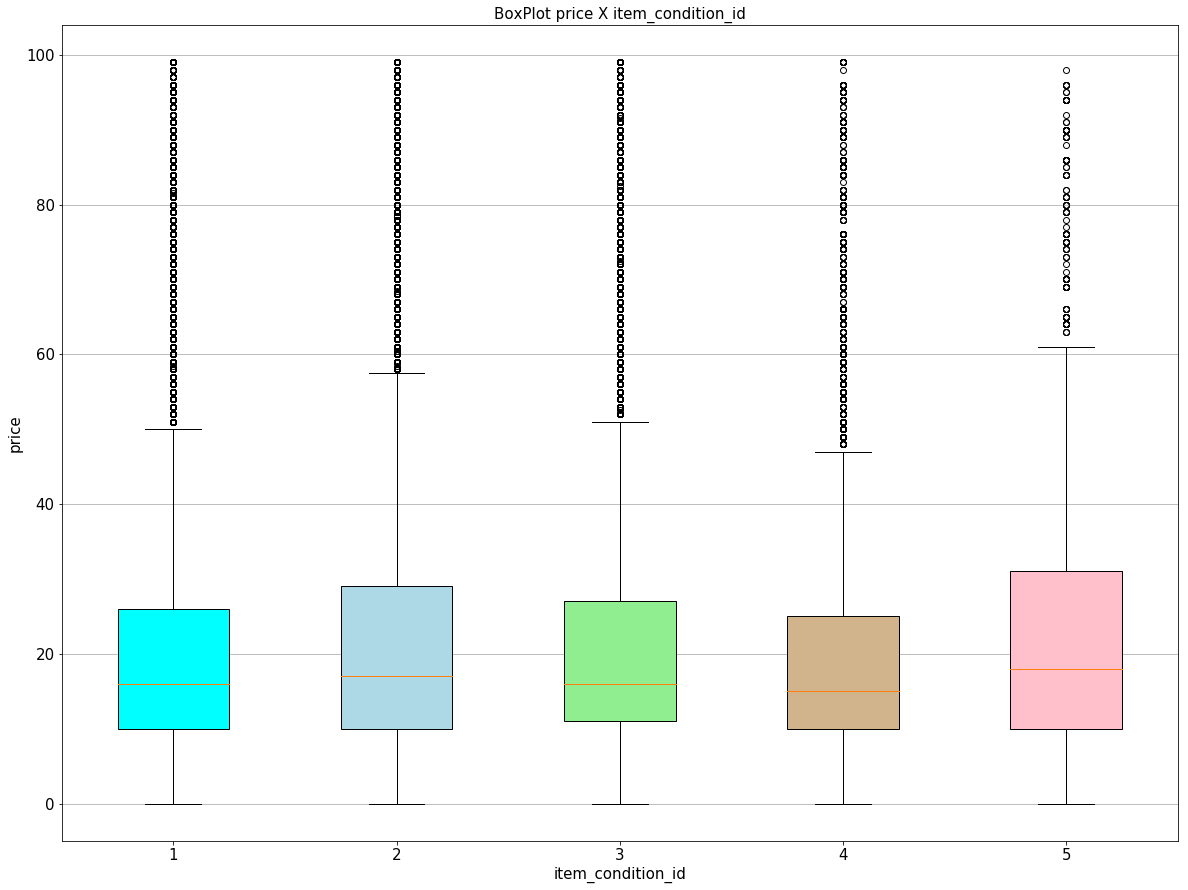

In [34]:
df = df_train[df_train['price']<100]

my_plot = []
for i in df_train['item_condition_id'].unique():
    my_plot.append(df[df['item_condition_id']==i]['price'])
fig, axes = plt.subplots(figsize=(20, 15))
bp = axes.boxplot(my_plot,vert=True,patch_artist=True,labels=range(1,6)) 

colors = ['cyan', 'lightblue', 'lightgreen', 'tan', 'pink']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

axes.yaxis.grid(True)

plt.title('BoxPlot price X item_condition_id', fontsize=15)
plt.xlabel('item_condition_id', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

del df

(-0.5, 1439.5, 1079.5, -0.5)

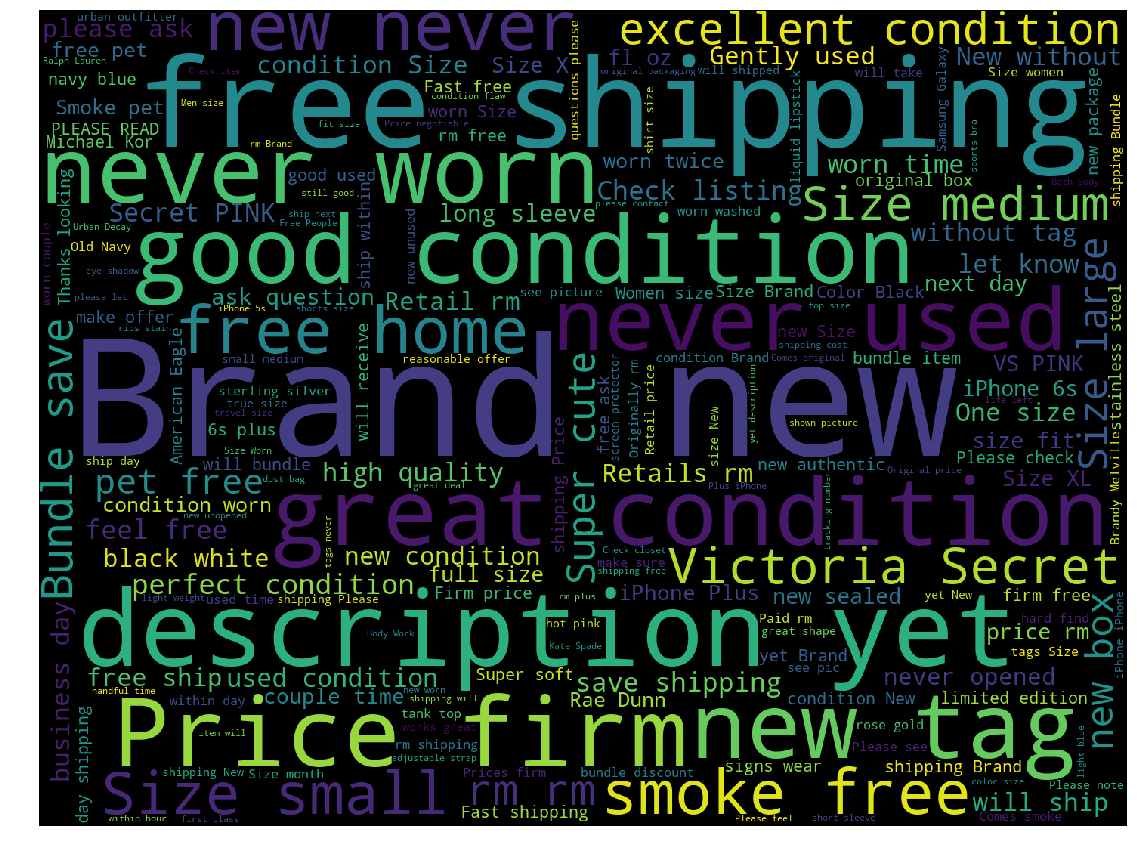

In [37]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(df_train['item_description']
.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')